In [1]:
import matplotlib.pyplot as plt
import numpy as np
import imageio.v3 as iio
import os
from toolz import pipe
import pandas as pd

from support_functions import *
from micropattern_analysis import *

# Analysis of MPs from Polina's fate experiment

In [2]:
dir = r"D:\OneDrive - Universität Wien\Adameyko Lab\FS9_Polina_Analysis\images"
os.chdir(dir)
dirs = os.listdir(".")
print(dirs)

['all_fates_pax6', 'neural_crest_pax6', 'neural_crest_six1', 'neural_plate_pax6', 'neural_plate_six1', 'placode_pax6', 'placode_six1']


In [3]:
file_names, images = zip(*get_files_and_images(dirs).items())

In [4]:
file_names = list(file_names)
images = list(images)

## Image Preprocessing

### PAX6 all fates images

IndexError: index 3 is out of bounds for axis 0 with size 3

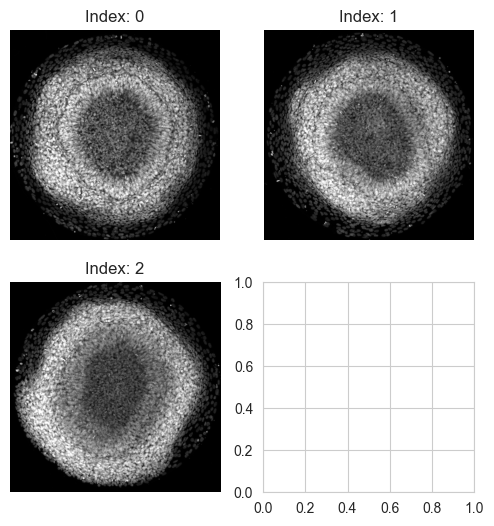

In [5]:
cur_images = images[0:3]
cur_images = list(map(
    lambda x: maximise_img_channels(x),
    cur_images[0:3]
))
cur_images.append(images[3])

channel = 3
fig, ax = plot_images(cur_images, channel, fig_size=(6,6))

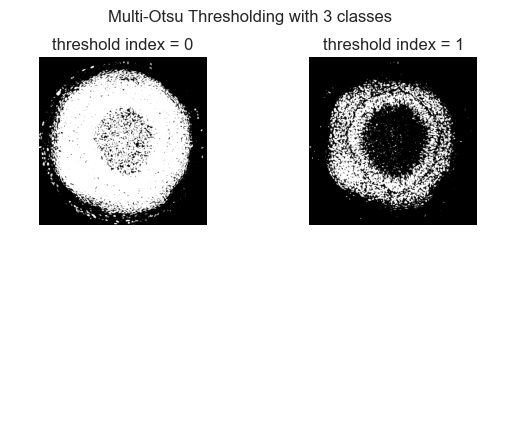

In [6]:
plot_multi_otsu_thresholds(cur_images[0], channel, 3)

In [7]:
del cur_images[-1]
del images[3]
del file_names[3]

dapi_num = 3

images_new = list(map(
    lambda x:
    pipe(
        x,
        lambda f: apply_multiotsu_to_image(f, dapi_num, num_classes=3, threshold_index=0),
        lambda f: apply_multiotsu_to_channel(f, 0, num_classes=3),
        lambda f: apply_multiotsu_to_channel(f, 1, num_classes=3),
        lambda f: apply_multiotsu_to_channel(f, 2, num_classes=3)
    ),
    cur_images)
)

### PAX6 neural crest fate images

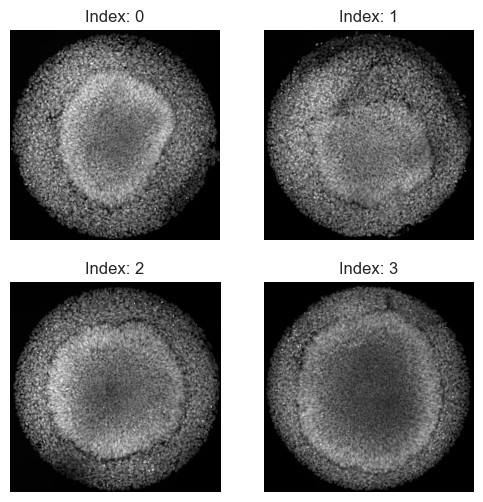

In [21]:
cur_images = images[3:7]
cur_images = list(map(
    lambda x: maximise_img_channels(x),
    cur_images
))

channel = 3
fig, ax = plot_images(cur_images, channel, fig_size=(6,6))

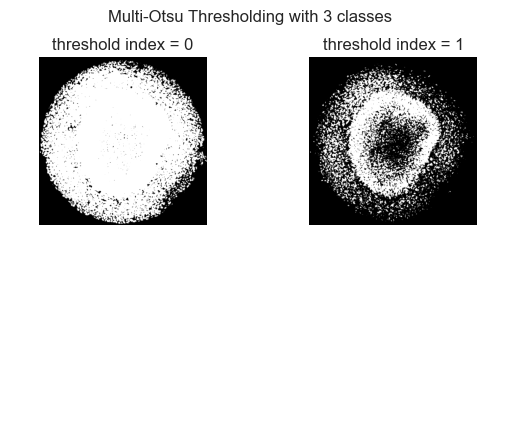

In [18]:
plot_multi_otsu_thresholds(cur_images[0], channel, 3)

In [22]:
del cur_images[1]
del cur_images[-1]
del images[4]
del images[6]
del file_names[4]
del file_names[6]

dapi_num = 3

images_new = images_new.extend(list(map(
    lambda x:
    pipe(
        x,
        lambda f: apply_multiotsu_to_image(f, dapi_num, num_classes=3, threshold_index=0),
        #   lambda f: apply_multiotsu_to_channel(f, 0, num_classes=3),
        #   ^ channel above only background, so no threshold
        lambda f: apply_multiotsu_to_channel(f, 1, num_classes=3, threshold_index=0),
        lambda f: apply_multiotsu_to_channel(f, 2, num_classes=3)
    ),
    cur_images)
))

### SIX1 neural crest fate images

In [34]:
file_names

['all_fates_pax6\\all_fates_Day6_pax6_488_sox10_546_isl12_647_dapi_2023_01_24__16_11_42.lsm',
 'all_fates_pax6\\all_fates_Day6_pax6_488_sox10_546_isl12_647_dapi_2023_01_24__16_14_02.lsm',
 'all_fates_pax6\\all_fates_Day6_pax6_488_sox10_546_isl12_647_dapi_2023_01_24__16_16_24.lsm',
 'neural_crest_pax6\\neural_crest_Day6_pax6_488_sox10_546_isl12_647_dapi_2023_01_20__16_21_08.lsm',
 'neural_crest_pax6\\neural_crest_Day6_pax6_488_sox10_546_isl12_647_dapi_2023_01_20__16_25_59.lsm',
 'neural_crest_pax6\\neural_crest_Day6_pax6_488_sox10_546_isl12_647_dapi_2023_01_20__16_28_57.lsm',
 'neural_crest_six1\\neural_crest_day_6_six1_488_sox10_546_isl12_647_dapi_2023_01_18__14_52_57.lsm',
 'neural_crest_six1\\neural_crest_day_6_six1_488_sox10_546_isl12_647_dapi_2023_01_18__14_55_55.lsm',
 'neural_crest_six1\\neural_crest_day_6_six1_488_sox10_546_isl12_647_dapi_2023_01_18__14_58_21.lsm',
 'neural_plate_pax6\\neural_Day6_pax6_488_sox10_546_isl12_647_dapi_2023_01_20__19_01_03.lsm',
 'neural_plate_pax6\\

In [ ]:
cur_images = images[3:7]
cur_images = list(map(
    lambda x: maximise_img_channels(x),
    cur_images
))

channel = 3
fig, ax = plot_images(cur_images, channel, fig_size=(6,6))